In [9]:
from lsh import *
from utils import *
from query import *
import time

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:

k = 10
L = 4
d = 1024   #data dimensionality
N_queries = 10

Ns = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
Ns = range(1000, )

d1s = []
d2s = []
print("N, LSH, Linear ")
for n_idx, n in enumerate(Ns):
    G = data_generator(n=n,d=d,normalize=True)
    b = 200 #hash bits
    M = 30  #number of permutations
    model = LSH(X=G.get_dataset(),b=b,M=M)

    t1 = time.time()
    for i in range(N_queries):
        model.approx_top_k(G.get_query(), k, L, refine="innerprod")
    t2 = time.time()
    duration1 = (t2-t1)/N_queries*1000
    
    t1 = time.time()
    for i in range(N_queries):
        model.exact_top_k(G.get_query(), k)
    t2 = time.time()
    duration2 = (t2-t1)/N_queries*1000
    
    print("{},{:6.3f}, {:6.3f}".format(n, duration1, duration2))
    d1s.append(duration1)
    d2s.append(duration2)
    



 0.898,  0.064
 0.905,  0.067
 1.007,  0.070
 1.471,  0.093
 2.827,  0.397
 3.993,  1.237
 4.616,  5.540
 5.008, 16.376
 7.294, 61.024
960.918, 205.700


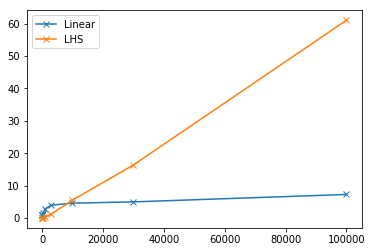

In [31]:
plt.plot(Ns, d1s[:-1], '-x', label="Linear")
plt.plot(Ns, d2s[:-1], '-x', label="LHS")
plt.legend()

In [29]:
Ns

[10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]

In [30]:
Ns = Ns[:-1]
print(Ns)

[10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
